<a href="https://colab.research.google.com/github/rameelarustam47/Perdiction-of-wheat-yield-of-Faisaabad-district-by-using-regression-Models/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn


In [ ]:
!pip install pandas matplotlib seaborn ipykernel openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

Predicted wheat yield for 2022-23 (Area + N): 3.033075 t/ha
Predicted wheat yield for 2023-24 (Area + N): 3.019067 t/ha

Regression Metrics (Training Data - Area + N, Polynomial Ridge):
R² Score: 0.8998
Mean Absolute Error (MAE): 0.028332
Mean Squared Error (MSE): 0.001196
Root Mean Squared Error (RMSE): 0.034577
Mean Absolute Percentage Error (MAPE): 0.95%



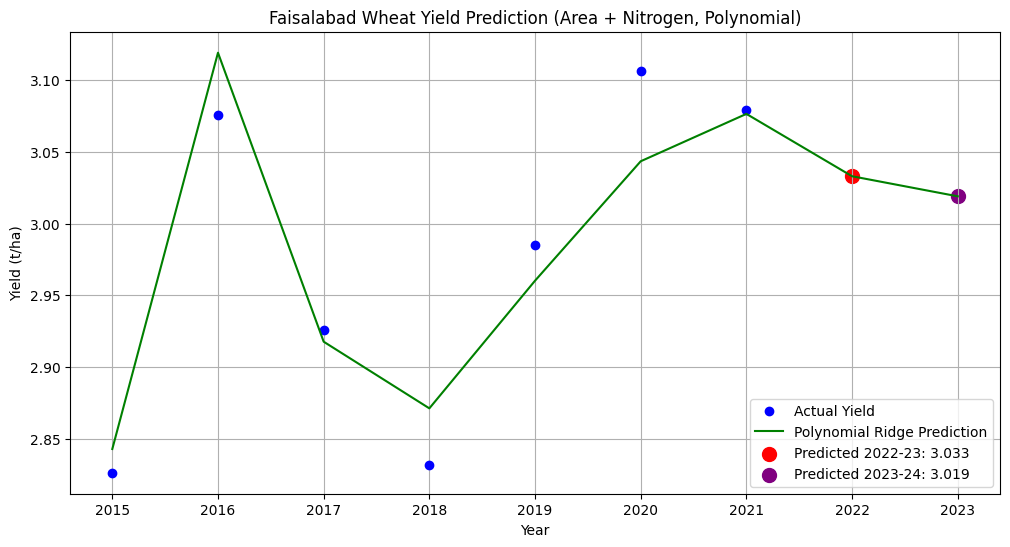

In [17]:
# -------------------------------
# POLYNOMIAL REGRESSION: AREA + NITROGEN (N)
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Prepare historical data (2015-16 to 2021-22)
# Columns: Area, Nitrogen (N)
X = np.array([
    [6902.18, 2519.95],  # 2015-16
    [6649.67, 2519.95],  # 2016-17
    [6549.31, 2381.25],  # 2017-18
    [6484.15, 2306.95],  # 2018-19
    [6480.92, 2274.15],  # 2019-20
    [6709.16, 2504.00],  # 2020-21
    [6305.34, 2500.50]   # 2021-22
])

# Target: Wheat yield (t/ha)
y = np.array([2.826251, 3.075974, 2.925943, 2.831802, 2.985235, 3.106539, 3.079399])

# -------------------------------
# 2. Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# -------------------------------
# 3. Train Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y)

# -------------------------------
# 4. Predict 2022-23 and 2023-24
X_2022 = np.array([[6221.518, 2500.50]])  # 2022 area + N
X_2023 = np.array([[6200, 2500.50]])      # 2023 area + N

X_2022_poly = poly.transform(X_2022)
X_2023_poly = poly.transform(X_2023)

predicted_yield_2022 = ridge_model.predict(X_2022_poly)[0]
predicted_yield_2023 = ridge_model.predict(X_2023_poly)[0]

print(f"Predicted wheat yield for 2022-23 (Area + N): {predicted_yield_2022:.6f} t/ha")
print(f"Predicted wheat yield for 2023-24 (Area + N): {predicted_yield_2023:.6f} t/ha\n")

# -------------------------------
# 5. Regression metrics on training data
predictions = ridge_model.predict(X_poly)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y - predictions) / y)) * 100

print("Regression Metrics (Training Data - Area + N, Polynomial Ridge):")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

# -------------------------------
# 6. Plot actual vs predicted yields + 2022 & 2023
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021])
years_extended = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

X_extended = np.vstack([X, X_2022, X_2023])
X_extended_poly = poly.transform(X_extended)
predictions_extended = ridge_model.predict(X_extended_poly)

plt.figure(figsize=(12,6))
plt.plot(years, y, 'o', color='blue', label='Actual Yield')
plt.plot(years_extended, predictions_extended, '-', color='green', label='Polynomial Ridge Prediction')
plt.scatter(2022, predicted_yield_2022, color='red', s=100, label=f'Predicted 2022-23: {predicted_yield_2022:.3f}')
plt.scatter(2023, predicted_yield_2023, color='purple', s=100, label=f'Predicted 2023-24: {predicted_yield_2023:.3f}')
plt.title("Faisalabad Wheat Yield Prediction (Area + Nitrogen, Polynomial)")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.xticks(years_extended)
plt.grid(True)
plt.legend()
plt.show()


Predicted wheat yield for 2022-23 (Area + P): 3.023647 t/ha
Predicted wheat yield for 2023-24 (Area + P): 3.007070 t/ha

Regression Metrics (Training Data - Area + P, Polynomial Ridge):
R² Score: 0.8772
Mean Absolute Error (MAE): 0.032393
Mean Squared Error (MSE): 0.001465
Root Mean Squared Error (RMSE): 0.038280
Mean Absolute Percentage Error (MAPE): 1.08%



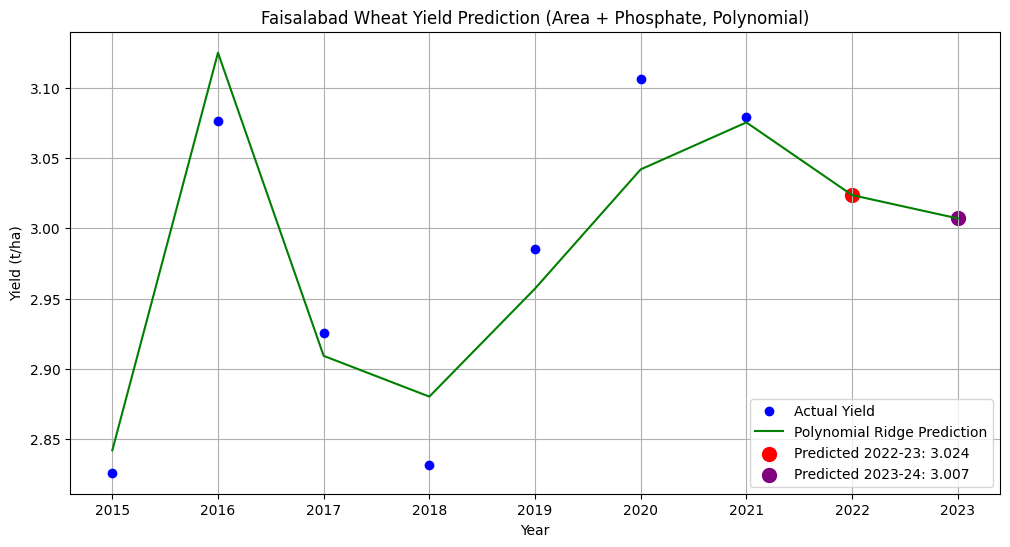

In [18]:
# -------------------------------
# POLYNOMIAL REGRESSION: AREA + PHOSPHATE (P)
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Prepare historical data (2015-16 to 2021-22)
# Columns: Area, Phosphate (P)
X = np.array([
    [6902.18, 302.39],  # 2015-16
    [6649.67, 302.39],  # 2016-17
    [6549.31, 285.75],  # 2017-18
    [6484.15, 276.83],  # 2018-19
    [6480.92, 272.90],  # 2019-20
    [6709.16, 300.48],  # 2020-21
    [6305.34, 300.10]   # 2021-22
])

# Target: Wheat yield (t/ha)
y = np.array([2.826251, 3.075974, 2.925943, 2.831802, 2.985235, 3.106539, 3.079399])

# -------------------------------
# 2. Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# -------------------------------
# 3. Train Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y)

# -------------------------------
# 4. Predict 2022-23 and 2023-24
X_2022 = np.array([[6221.518, 300.10]])  # 2022 area + P
X_2023 = np.array([[6200, 300.10]])      # 2023 area + P

X_2022_poly = poly.transform(X_2022)
X_2023_poly = poly.transform(X_2023)

predicted_yield_2022 = ridge_model.predict(X_2022_poly)[0]
predicted_yield_2023 = ridge_model.predict(X_2023_poly)[0]

print(f"Predicted wheat yield for 2022-23 (Area + P): {predicted_yield_2022:.6f} t/ha")
print(f"Predicted wheat yield for 2023-24 (Area + P): {predicted_yield_2023:.6f} t/ha\n")

# -------------------------------
# 5. Regression metrics on training data
predictions = ridge_model.predict(X_poly)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y - predictions) / y)) * 100

print("Regression Metrics (Training Data - Area + P, Polynomial Ridge):")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

# -------------------------------
# 6. Plot actual vs predicted yields + 2022 & 2023
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021])
years_extended = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

X_extended = np.vstack([X, X_2022, X_2023])
X_extended_poly = poly.transform(X_extended)
predictions_extended = ridge_model.predict(X_extended_poly)

plt.figure(figsize=(12,6))
plt.plot(years, y, 'o', color='blue', label='Actual Yield')
plt.plot(years_extended, predictions_extended, '-', color='green', label='Polynomial Ridge Prediction')
plt.scatter(2022, predicted_yield_2022, color='red', s=100, label=f'Predicted 2022-23: {predicted_yield_2022:.3f}')
plt.scatter(2023, predicted_yield_2023, color='purple', s=100, label=f'Predicted 2023-24: {predicted_yield_2023:.3f}')
plt.title("Faisalabad Wheat Yield Prediction (Area + Phosphate, Polynomial)")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.xticks(years_extended)
plt.grid(True)
plt.legend()
plt.show()


Predicted wheat yield for 2022-23 (Area + K): 3.024544 t/ha
Predicted wheat yield for 2023-24 (Area + K): 3.008275 t/ha

Regression Metrics (Training Data - Area + K, Polynomial Ridge):
R² Score: 0.8749
Mean Absolute Error (MAE): 0.032633
Mean Squared Error (MSE): 0.001493
Root Mean Squared Error (RMSE): 0.038644
Mean Absolute Percentage Error (MAPE): 1.09%



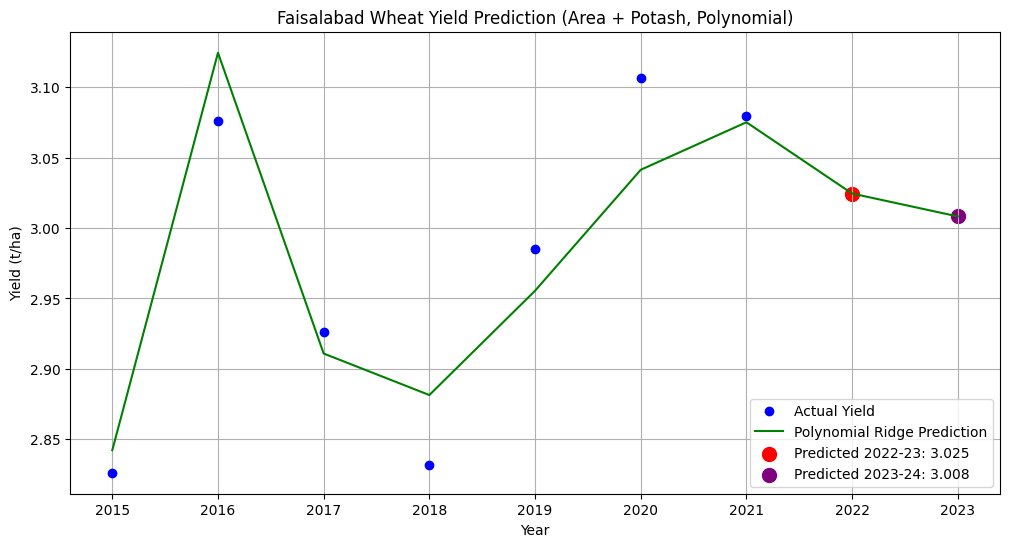

In [19]:
# -------------------------------
# POLYNOMIAL REGRESSION: AREA + POTASH (K)
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Prepare historical data (2015-16 to 2021-22)
# Columns: Area, Potash (K)
X = np.array([
    [6902.18, 75.60],  # 2015-16
    [6649.67, 75.60],  # 2016-17
    [6549.31, 71.44],  # 2017-18
    [6484.15, 69.21],  # 2018-19
    [6480.92, 68.22],  # 2019-20
    [6709.16, 75.12],  # 2020-21
    [6305.34, 75.00]   # 2021-22
])

# Target: Wheat yield (t/ha)
y = np.array([2.826251, 3.075974, 2.925943, 2.831802, 2.985235, 3.106539, 3.079399])

# -------------------------------
# 2. Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# -------------------------------
# 3. Train Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y)

# -------------------------------
# 4. Predict 2022-23 and 2023-24
X_2022 = np.array([[6221.518, 75.00]])  # 2022 area + K
X_2023 = np.array([[6200, 75.00]])      # 2023 area + K

X_2022_poly = poly.transform(X_2022)
X_2023_poly = poly.transform(X_2023)

predicted_yield_2022 = ridge_model.predict(X_2022_poly)[0]
predicted_yield_2023 = ridge_model.predict(X_2023_poly)[0]

print(f"Predicted wheat yield for 2022-23 (Area + K): {predicted_yield_2022:.6f} t/ha")
print(f"Predicted wheat yield for 2023-24 (Area + K): {predicted_yield_2023:.6f} t/ha\n")

# -------------------------------
# 5. Regression metrics on training data
predictions = ridge_model.predict(X_poly)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y - predictions) / y)) * 100

print("Regression Metrics (Training Data - Area + K, Polynomial Ridge):")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

# -------------------------------
# 6. Plot actual vs predicted yields + 2022 & 2023
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021])
years_extended = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

X_extended = np.vstack([X, X_2022, X_2023])
X_extended_poly = poly.transform(X_extended)
predictions_extended = ridge_model.predict(X_extended_poly)

plt.figure(figsize=(12,6))
plt.plot(years, y, 'o', color='blue', label='Actual Yield')
plt.plot(years_extended, predictions_extended, '-', color='green', label='Polynomial Ridge Prediction')
plt.scatter(2022, predicted_yield_2022, color='red', s=100, label=f'Predicted 2022-23: {predicted_yield_2022:.3f}')
plt.scatter(2023, predicted_yield_2023, color='purple', s=100, label=f'Predicted 2023-24: {predicted_yield_2023:.3f}')
plt.title("Faisalabad Wheat Yield Prediction (Area + Potash, Polynomial)")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.xticks(years_extended)
plt.grid(True)
plt.legend()
plt.show()


Predicted wheat yield for 2022-23 (Area + N+P+K): 2.802617 t/ha
Predicted wheat yield for 2023-24 (Area + N+P+K): 2.721747 t/ha

Regression Metrics (Training Data - Area + N+P+K, Polynomial Ridge):
R² Score: 0.9967
Mean Absolute Error (MAE): 0.005231
Mean Squared Error (MSE): 0.000039
Root Mean Squared Error (RMSE): 0.006238
Mean Absolute Percentage Error (MAPE): 0.18%



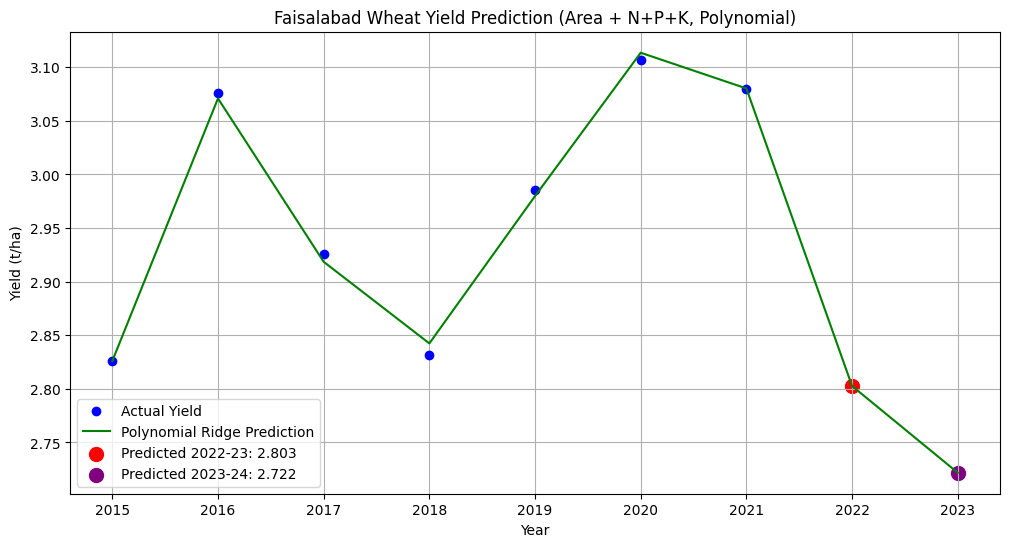

In [20]:
# -------------------------------
# POLYNOMIAL REGRESSION: AREA + N + P + K
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Prepare historical data (2015-16 to 2021-22)
# Columns: Area, N, P, K
X = np.array([
    [6902.18, 2519.95, 302.39, 75.60],  # 2015-16
    [6649.67, 2519.95, 302.39, 75.60],  # 2016-17
    [6549.31, 2381.25, 285.75, 71.44],  # 2017-18
    [6484.15, 2306.95, 276.83, 69.21],  # 2018-19
    [6480.92, 2274.15, 272.90, 68.22],  # 2019-20
    [6709.16, 2504.00, 300.48, 75.12],  # 2020-21
    [6305.34, 2500.50, 300.10, 75.00]   # 2021-22
])

# Target: Wheat yield (t/ha)
y = np.array([2.826251, 3.075974, 2.925943, 2.831802, 2.985235, 3.106539, 3.079399])

# -------------------------------
# 2. Transform features to polynomial (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# -------------------------------
# 3. Train Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y)

# -------------------------------
# 4. Predict 2022-23 and 2023-24
X_2022 = np.array([[6221.518, 2500.50, 300.10, 75.00]])  # 2022 area + N+P+K
X_2023 = np.array([[6200, 2500.50, 300.10, 75.00]])      # 2023 area + N+P+K

X_2022_poly = poly.transform(X_2022)
X_2023_poly = poly.transform(X_2023)

predicted_yield_2022 = ridge_model.predict(X_2022_poly)[0]
predicted_yield_2023 = ridge_model.predict(X_2023_poly)[0]

print(f"Predicted wheat yield for 2022-23 (Area + N+P+K): {predicted_yield_2022:.6f} t/ha")
print(f"Predicted wheat yield for 2023-24 (Area + N+P+K): {predicted_yield_2023:.6f} t/ha\n")

# -------------------------------
# 5. Regression metrics on training data
predictions = ridge_model.predict(X_poly)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y - predictions) / y)) * 100

print("Regression Metrics (Training Data - Area + N+P+K, Polynomial Ridge):")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%\n")

# -------------------------------
# 6. Plot actual vs predicted yields + 2022 & 2023
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021])
years_extended = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

X_extended = np.vstack([X, X_2022, X_2023])
X_extended_poly = poly.transform(X_extended)
predictions_extended = ridge_model.predict(X_extended_poly)

plt.figure(figsize=(12,6))
plt.plot(years, y, 'o', color='blue', label='Actual Yield')
plt.plot(years_extended, predictions_extended, '-', color='green', label='Polynomial Ridge Prediction')
plt.scatter(2022, predicted_yield_2022, color='red', s=100, label=f'Predicted 2022-23: {predicted_yield_2022:.3f}')
plt.scatter(2023, predicted_yield_2023, color='purple', s=100, label=f'Predicted 2023-24: {predicted_yield_2023:.3f}')
plt.title("Faisalabad Wheat Yield Prediction (Area + N+P+K, Polynomial)")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.xticks(years_extended)
plt.grid(True)
plt.legend()
plt.show()
